# Import packages

In [5]:
import pandas as pd
import numpy as np

import warnings 
warnings.filterwarnings(('ignore'))
from ta.momentum import rsi
from ta.volume import volume_weighted_average_price

from scipy.signal import savgol_filter

from kucoin.client import Market
import pandas as pd
import numpy as np
from datetime import datetime
import time
import math
client = Market(url='https://api.kucoin.com')
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

from modules.Utils.utils import loadFromDB, computeFutureLinearRegression, strategyTester
from modules.Utils.indicators import computeLaggingLinearRegression, computeTrixIndicator, addIndicators, computeRSI_VWAP, computeMASlope


# Get Data

In [6]:
SYMBOL= 'BTC'
df =loadFromDB(SYMBOL,'1h')
df = computeRSI_VWAP(df,17,25)
df.dropna(inplace=True)
print(df.shape)
df.head()

(23436, 7)


,Open,High,Low,Close,Volume,Timestamp,RSI_VWAP
Date,,,,,,,
2020-01-01 17:00:00,7234.20,7246.42,7214.00,7245.37,881.932780,1577894400,100.0
2020-01-01 18:00:00,7244.34,7249.99,7224.92,7236.83,1069.210567,1577898000,100.0
2020-01-01 19:00:00,7237.02,7246.72,7225.17,7240.67,611.693307,1577901600,100.0
2020-01-01 20:00:00,7240.80,7241.00,7225.49,7229.48,417.746637,1577905200,100.0
2020-01-01 21:00:00,7229.48,7242.98,7224.68,7236.73,391.834174,1577908800,100.0


Period : [2020-01-01 17:00:00] -> [2022-09-05 12:00:00]
Starting balance : 1000 $

----- General Informations -----
Final balance : 2914.01 $
Performance vs US Dollar : 191.4 %
Buy and Hold Performence : 173.01 %
Performance vs Buy and Hold : 10.63 %
Best trade : +27.12 %, the 2021-01-09 18:00:00
Worst trade : -33.89 %, the 2021-05-25 23:00:00
Worst drawBack : -43.0 %
Total fees :  507.33 $

----- Trades Informations -----
Total trades on period : 119
Number of positive trades : 71
Number of negative trades :  48
Trades win rate ratio : 59.66 %
Average trades performance : 1.27 %
Average positive trades : 5.13 %
Average negative trades : -4.43 %

----- Plot -----


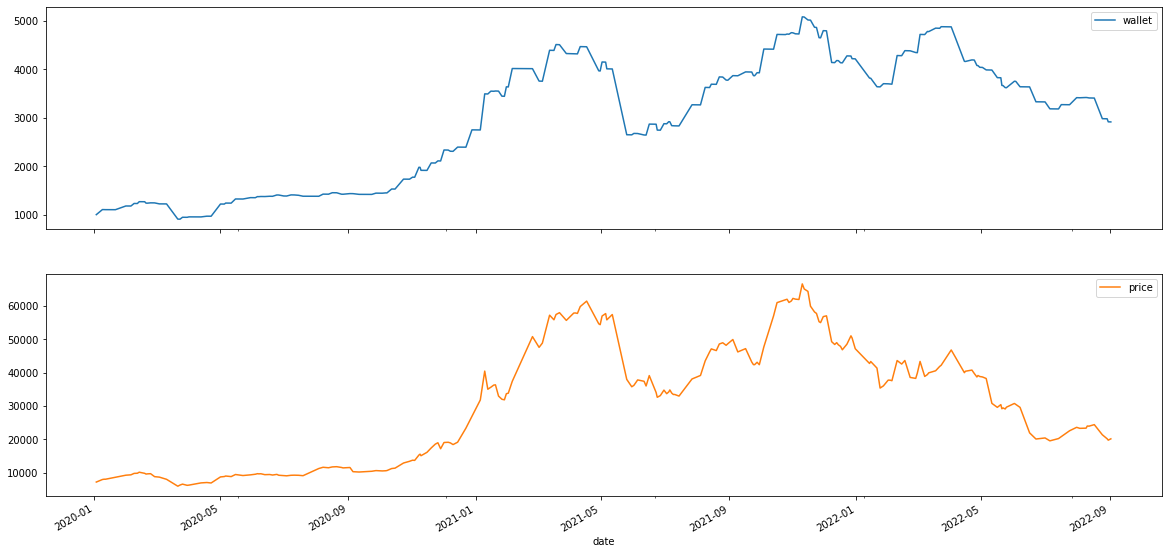

In [8]:
def buyCondition(row:pd.Series, previous_row:pd.Series=None)->bool:
    return True if row.RSI_VWAP>19 and previous_row.RSI_VWAP<19 else False

def sellCondition(row:pd.Series, previous_row:pd.Series=None)->bool:
    return True if row.RSI_VWAP<80 and previous_row.RSI_VWAP>80 else False

strategyTester(df,buyCondition,sellCondition,equity=1000)